# Árvores de Decisão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Vamos estudar Árvores de Decisão a partir do exemplo **Heart**

## Dataset Heart

Esta base de dados contém 303 amostras, divididas em duas classes que representam a presença ou não de doença cardíaca por angiografia coronária. Angiografia cardíaca é um exame de diagnóstico baseado em imagens que permite detctar se existem e onde estão localizadas possíveis anomalias nos vasos sanguíneos. Um contraste é injetado no paciente através de um cateter (um tubo fino)e isto permite visualizar mais claramente os vasos sanguíneos e diagnosticar problemas tais como a presença de coágulos, que podem levar a infarto. 

Existem duas classes: indivíduos com e sem problemas cardíacos. No dataset, eles foram identificados através de uma série laboriosa de testes e exames clínicos e laboratoriais adicionais. Assim, os indivíduos do dataset puderam ser rotulados sem muita margem de erro. O objetivo neste problema é criar uma regra de decisão usando  apenas variáveis (features) facilmente extraídas das imagens de angiografia cardíaca para classificar automaticamente os futuros pacientes em uma das duas classes. Queremos fazer esta classficação da forma mais correta possível e sem os custos envolvidos nos exames adicionais detalhados.  

As 13 variáveis (features ou atributos) medidos em cada paciente-imagem são as seguintes:
* Idade
* Sexo
* Nível de colesterol
* Medidas do coração e pulmão

In [2]:
data = pd.read_csv("heart.csv", index_col=0)
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
# Variável resposta é AHD - a última no dataframe
# Colocando a variável resposta como primeira coluna
data.set_index(data.columns[-1], inplace=True)
data.reset_index(inplace=True)
data.head()

,AHD,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,No,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,Yes,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,Yes,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,No,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,No,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


Vamos criar uma Árvore de Classificação para separar cada uma das classes.

#### Variáveis categóricas

Note que as classes não estão definidas em termos numéricos, sendo assim, vamos mudar o nome ''No'' e ''Yes'' por, respectivamente, 0 e 1.

In [10]:
data['AHD'] = data['AHD'].replace(['No','Yes'], [0,1])
data.head()

,AHD,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,1,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,0,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


#### Dummy

Além disso, perceba que duas variáveis são categóricas e, por isso, precisamos transformá-las em numéricas. Para isso, vamos utilizar o conceito de variável [Dummy](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).

In [11]:
data = pd.get_dummies(data, columns=['ChestPain', 'Thal'])
data.head()

,AHD,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,1,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,0,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,0,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


#### Valores NA (missing values)

Alguns valores na base de dados são NA (not assigned - missing values). Algumas variáveis não foram coletadas para alguns indivíduos. Vamos remover as amostras que possuem alguma variável NA.

In [12]:
print(data.shape)
data = data.dropna()

(303, 19)


In [13]:
data.shape

(299, 19)

Vamos z-normalizar os dados:

In [15]:
data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].mean())/data.iloc[:,1:].std(ddof=1)

In [16]:
data.head()

,AHD,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0,0.939100,0.691803,0.752929,-0.271605,2.403346,1.008439,0.021563,-0.697088,1.072479,2.263862,-0.717104,-0.955825,-0.624012,-0.441978,3.458304,3.944477,-1.100342,-0.789246
1,1,1.382512,0.691803,1.600115,0.749298,-0.414695,1.008439,-1.808109,1.429742,0.385081,0.644497,2.483107,1.042718,-0.624012,-0.441978,-0.288192,-0.252671,0.905769,-0.789246
2,1,1.382512,0.691803,-0.659049,-0.348655,-0.414695,1.008439,-0.893273,1.429742,1.330253,0.644497,1.416370,1.042718,-0.624012,-0.441978,-0.288192,-0.252671,-1.100342,1.262794
3,0,-1.943080,0.691803,-0.094258,0.055854,-0.414695,-1.001716,1.633418,-0.697088,2.103576,2.263862,-0.717104,-0.955825,1.597174,-0.441978,-0.288192,-0.252671,0.905769,-0.789246
4,0,-1.499668,-1.440663,-0.094258,-0.830213,-0.414695,1.008439,0.979963,-0.697088,0.299156,-0.974869,-0.717104,-0.955825,-0.624012,2.254989,-0.288192,-0.252671,0.905769,-0.789246


#### Visualizando as variáveis

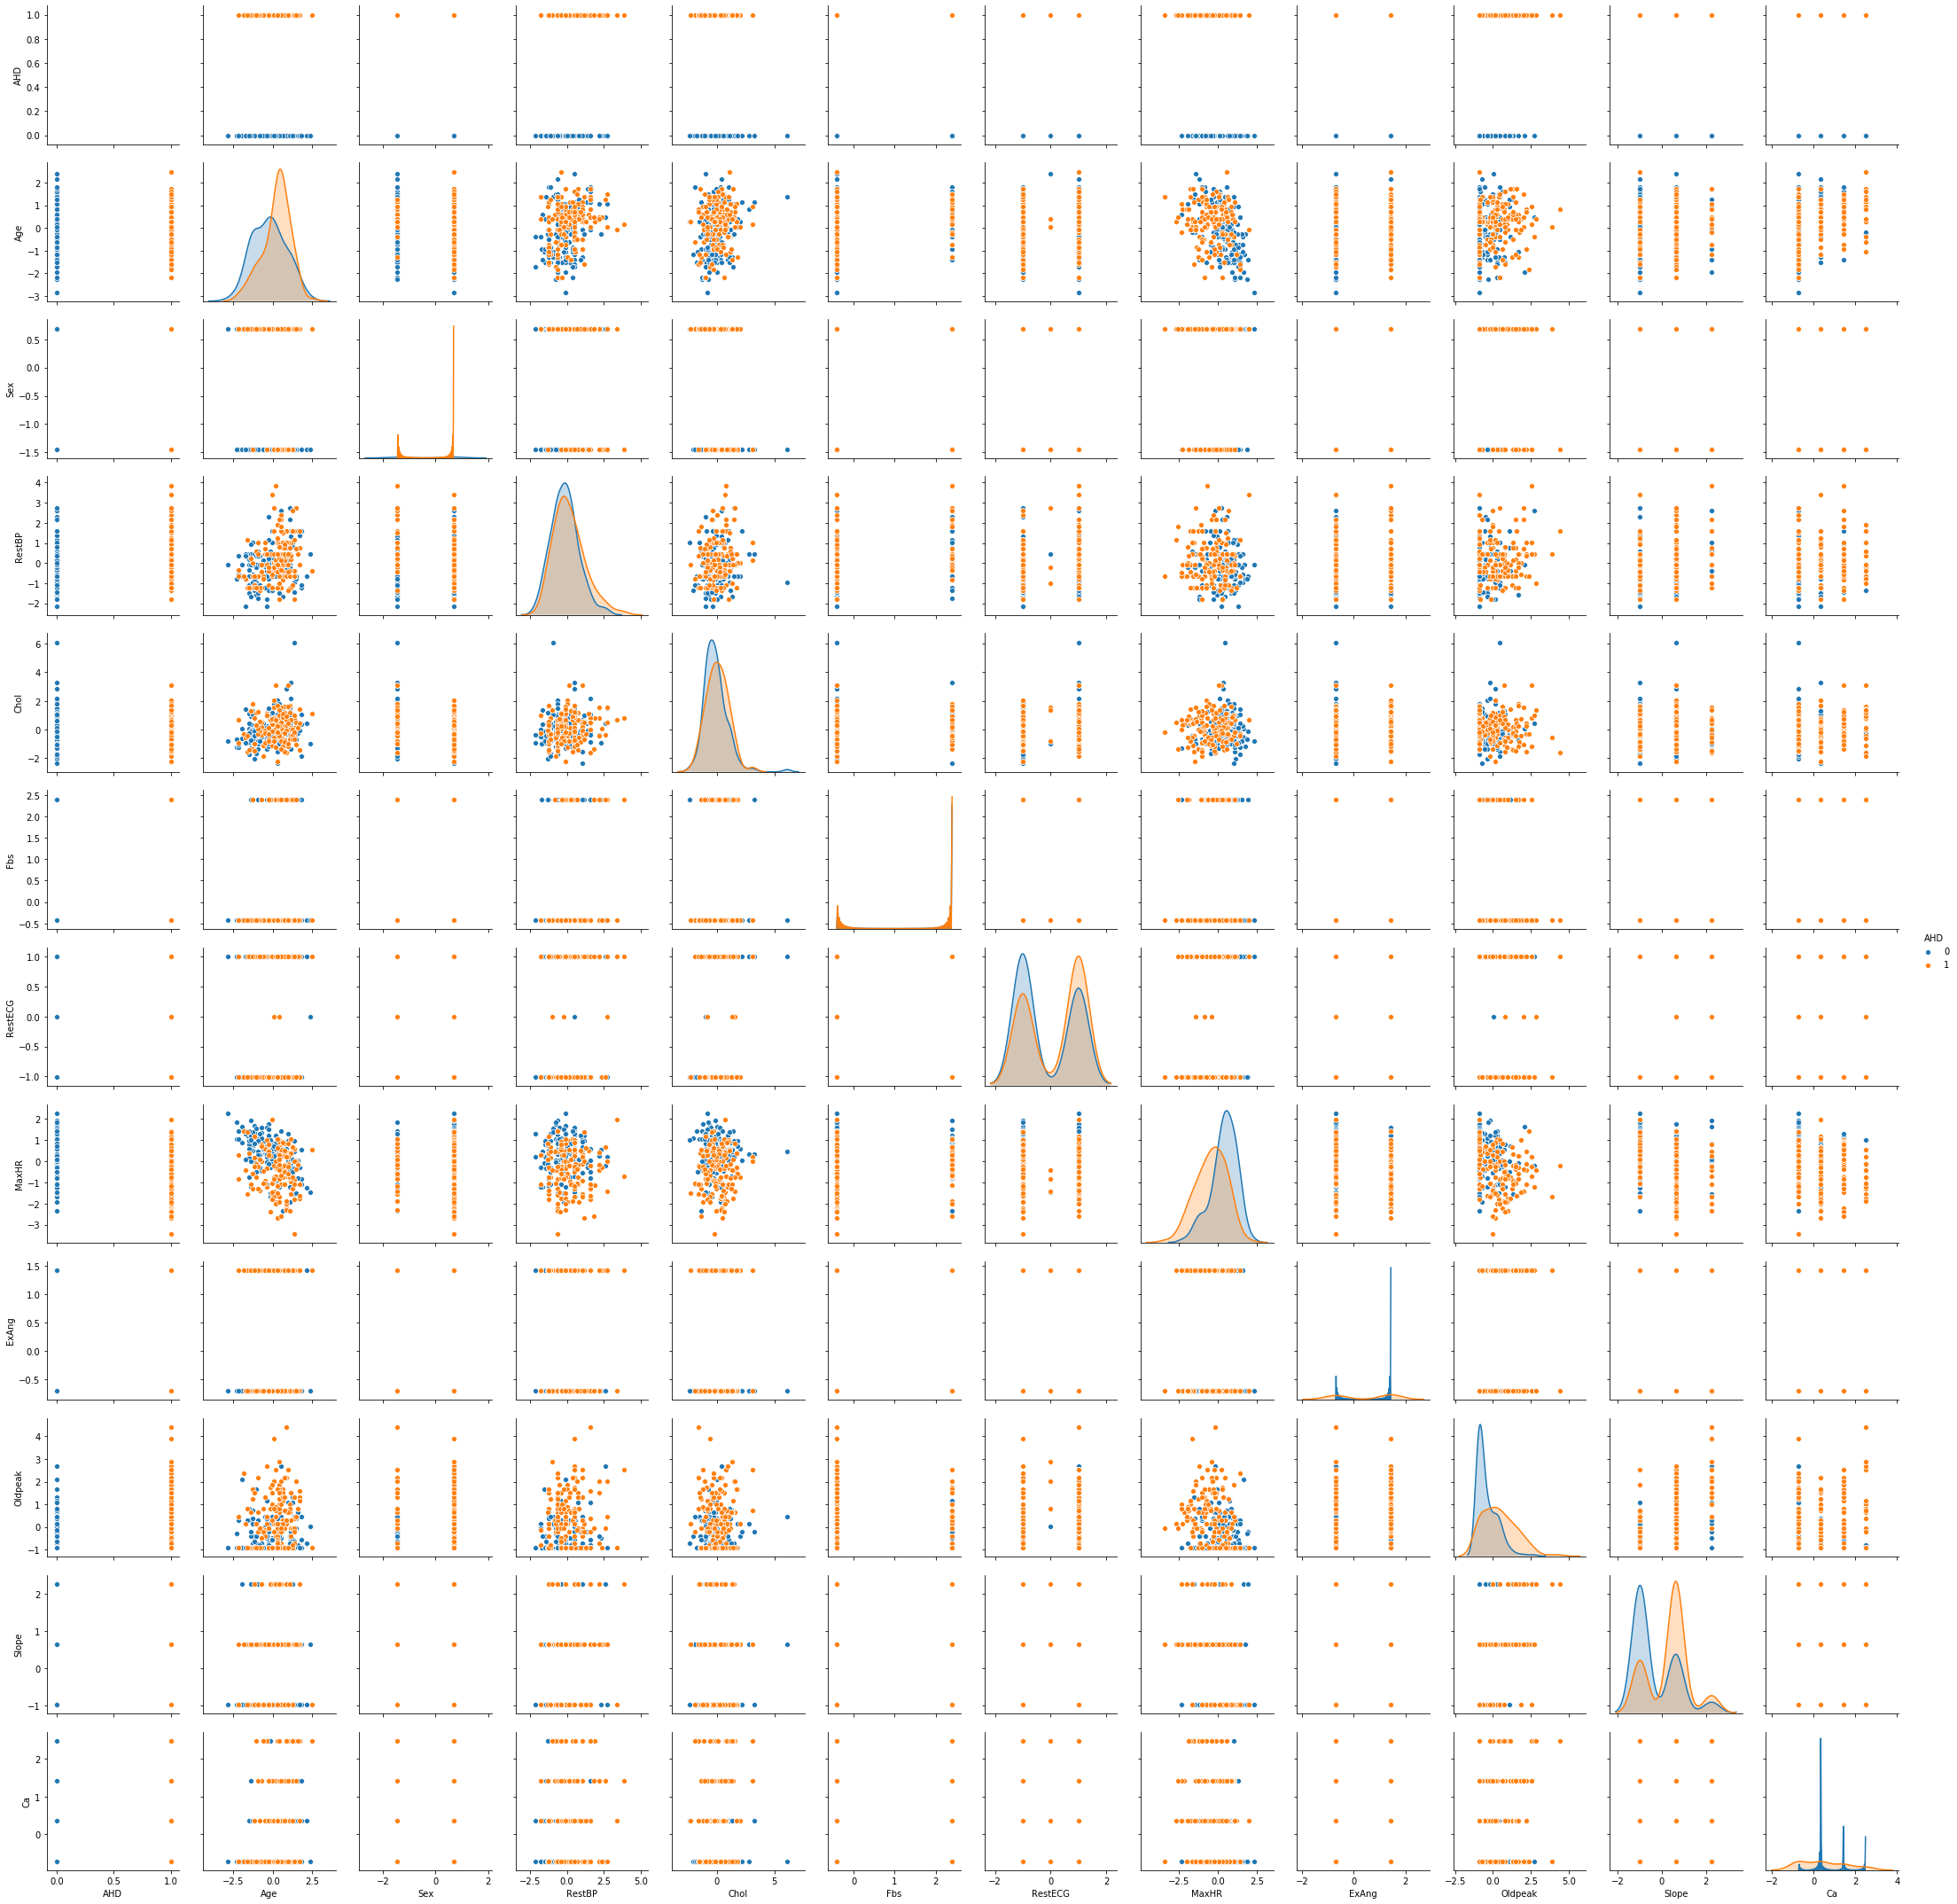

In [17]:
sns.pairplot(data.iloc[:,:12], hue="AHD")
#sns.pairplot(data.iloc[:,:4], hue="AHD")

Separando as variáveis preditoras, X, da variável resposta, y:

In [18]:
X, y = data.iloc[:,1:].values, data.iloc[:,0].values

## Heart dataset 2

In [19]:
data2 = pd.read_csv("heart_2.csv")
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X, y = data2.iloc[:,:13].values, data2.iloc[:,13].values

#### Visualizando as variáveis

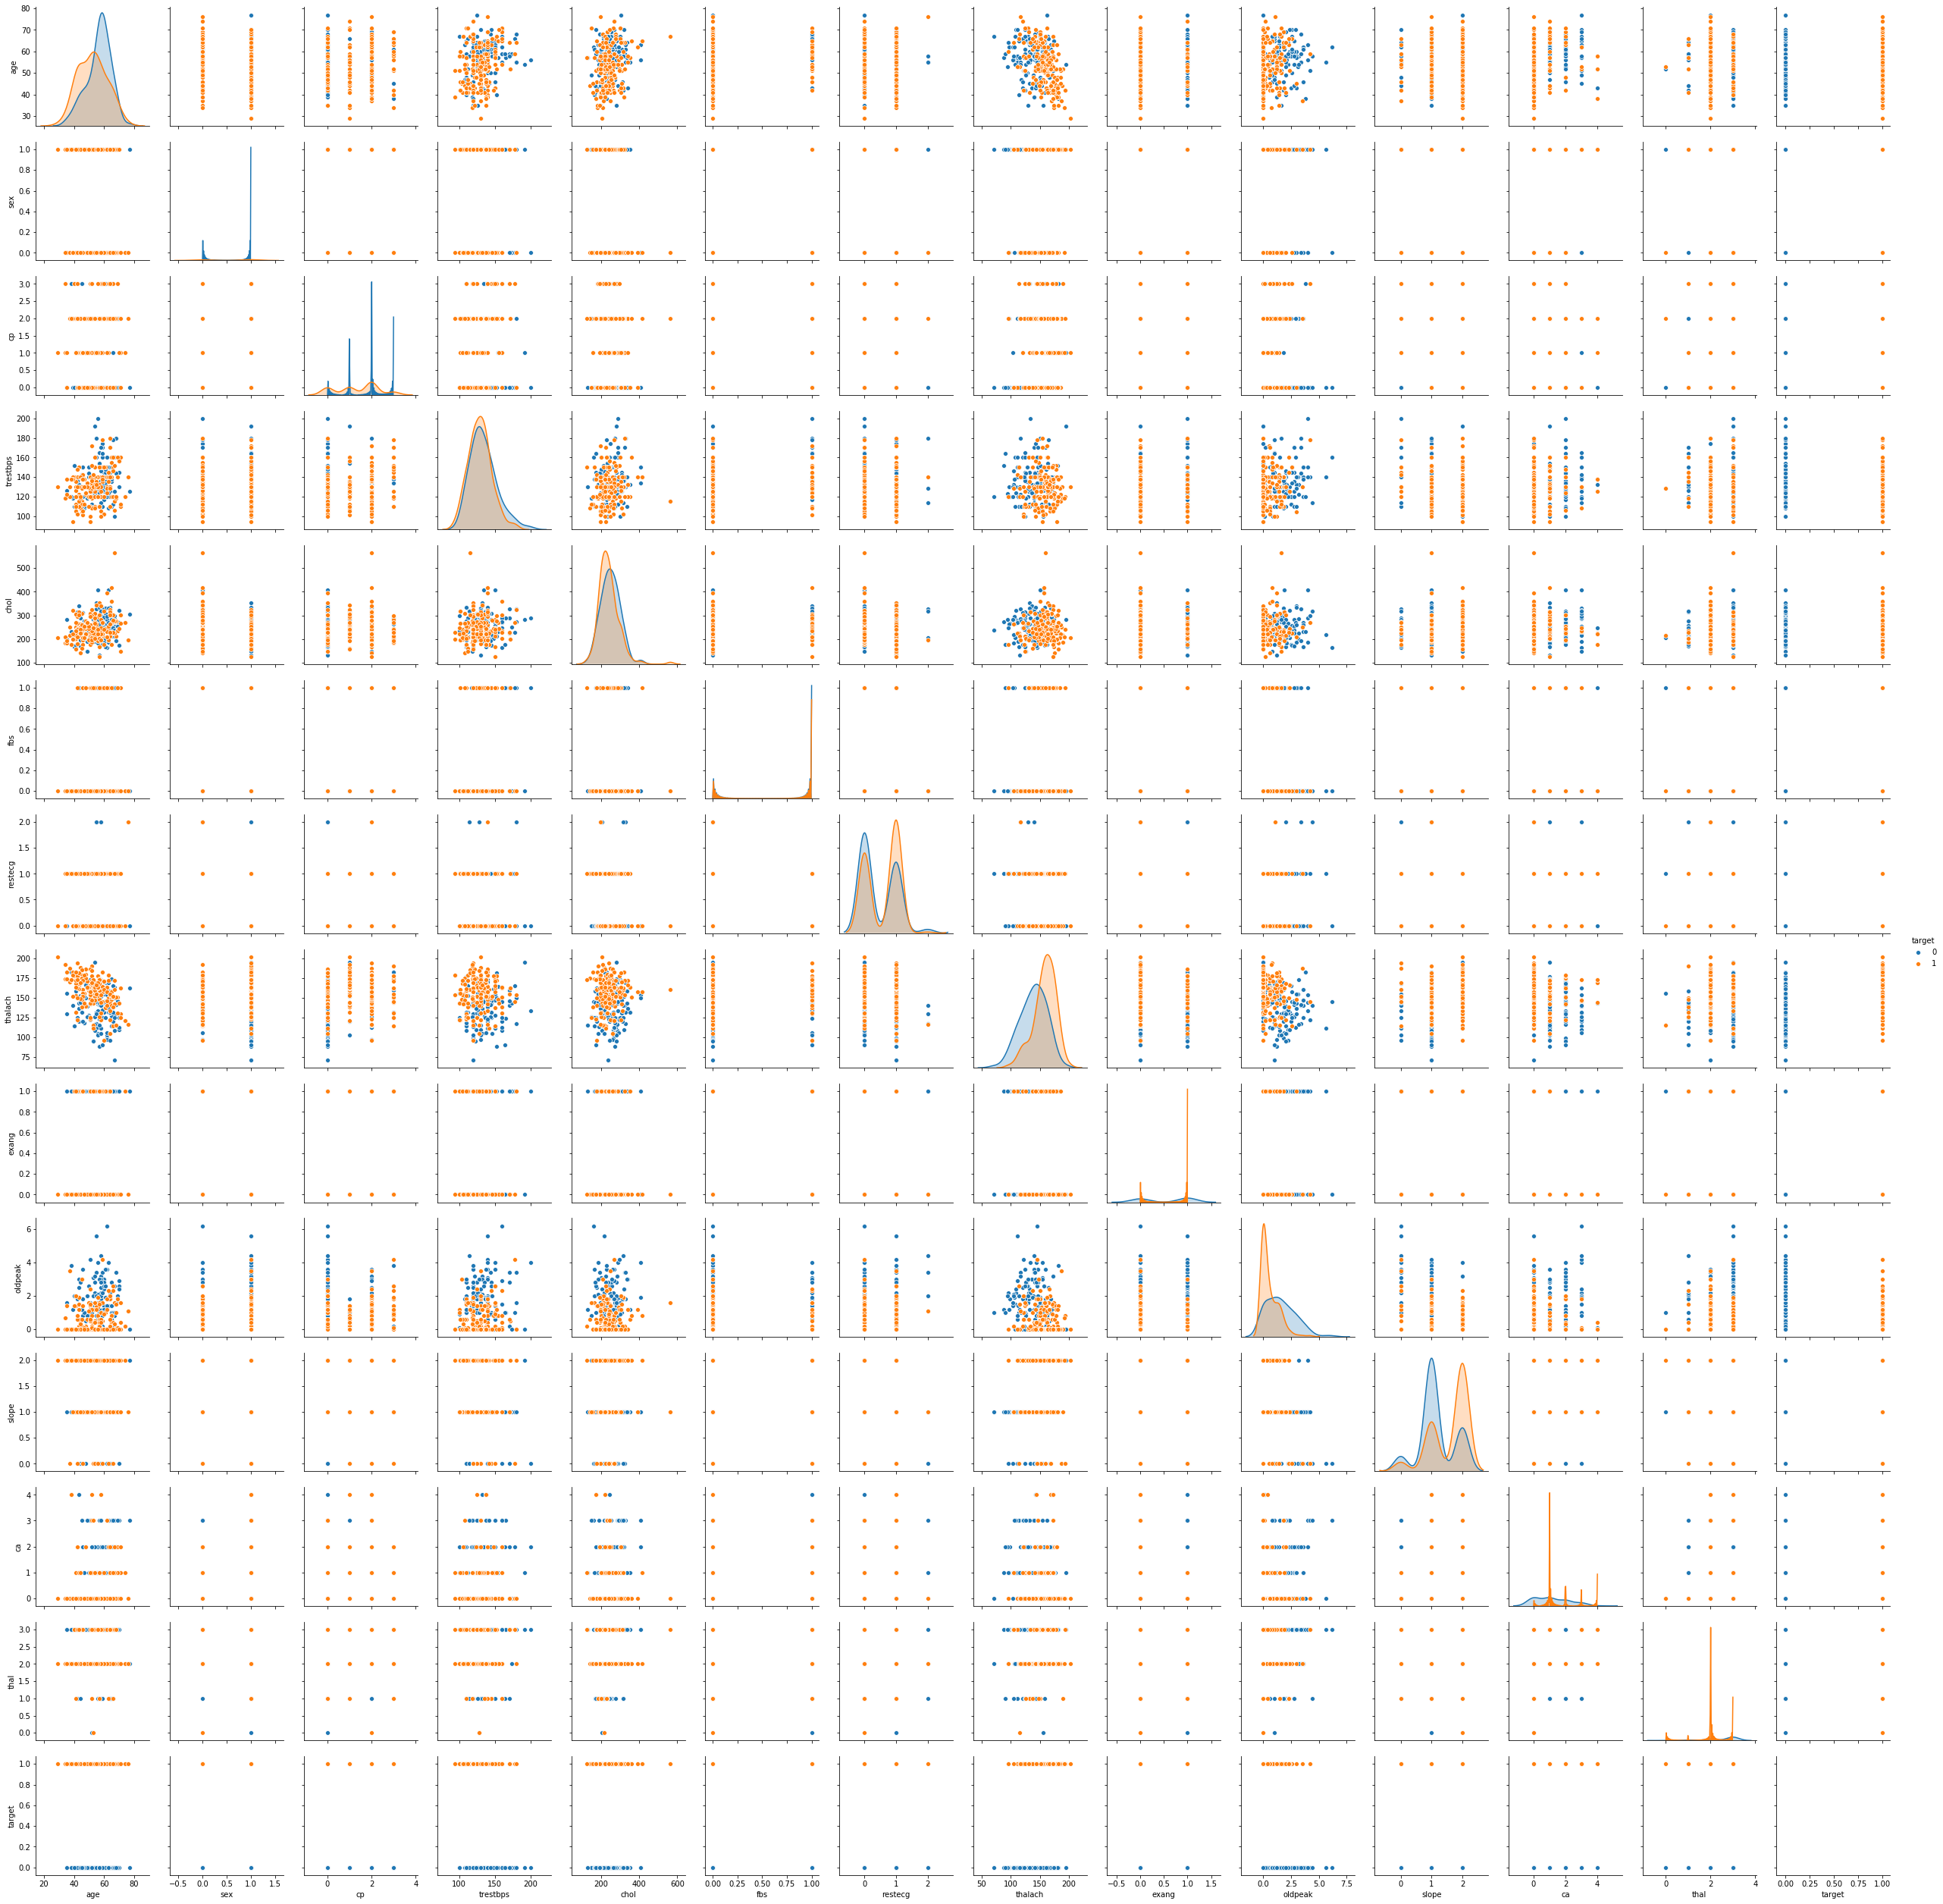

In [21]:
sns.pairplot(data2, hue="target")

## Árvore de Classificação via scikit-learn

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

In [15]:
def plot_tree_decision_regions(X, y, criterion="gini", max_depth=None, min_samples_leaf=1):
    
    plt.figure(figsize=(15,5))

    # Parameters
    plot_colors = "rb"
    plot_step = 0.02

    pairs_list = []
    for i in range(1, 4):
        for j in range(i+1, 4):
            pairs_list.append([i,j])

    for pairidx, pair in enumerate(pairs_list):

        X = data.iloc[:, pair].to_numpy()
        y = data.iloc[:, 0].to_numpy()

        # Train
        clf = tree.DecisionTreeClassifier(criterion=criterion, 
                                          max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf).fit(X, y)

        # Plot the decision boundary
        plt.subplot(1, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])

        # Plot the training points    
        for l, c in zip(np.unique(y), plot_colors):
            plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

In [16]:
clf = tree.DecisionTreeClassifier()
X_tree_scikit = clf.fit(X, y)

clf.get_depth()

10

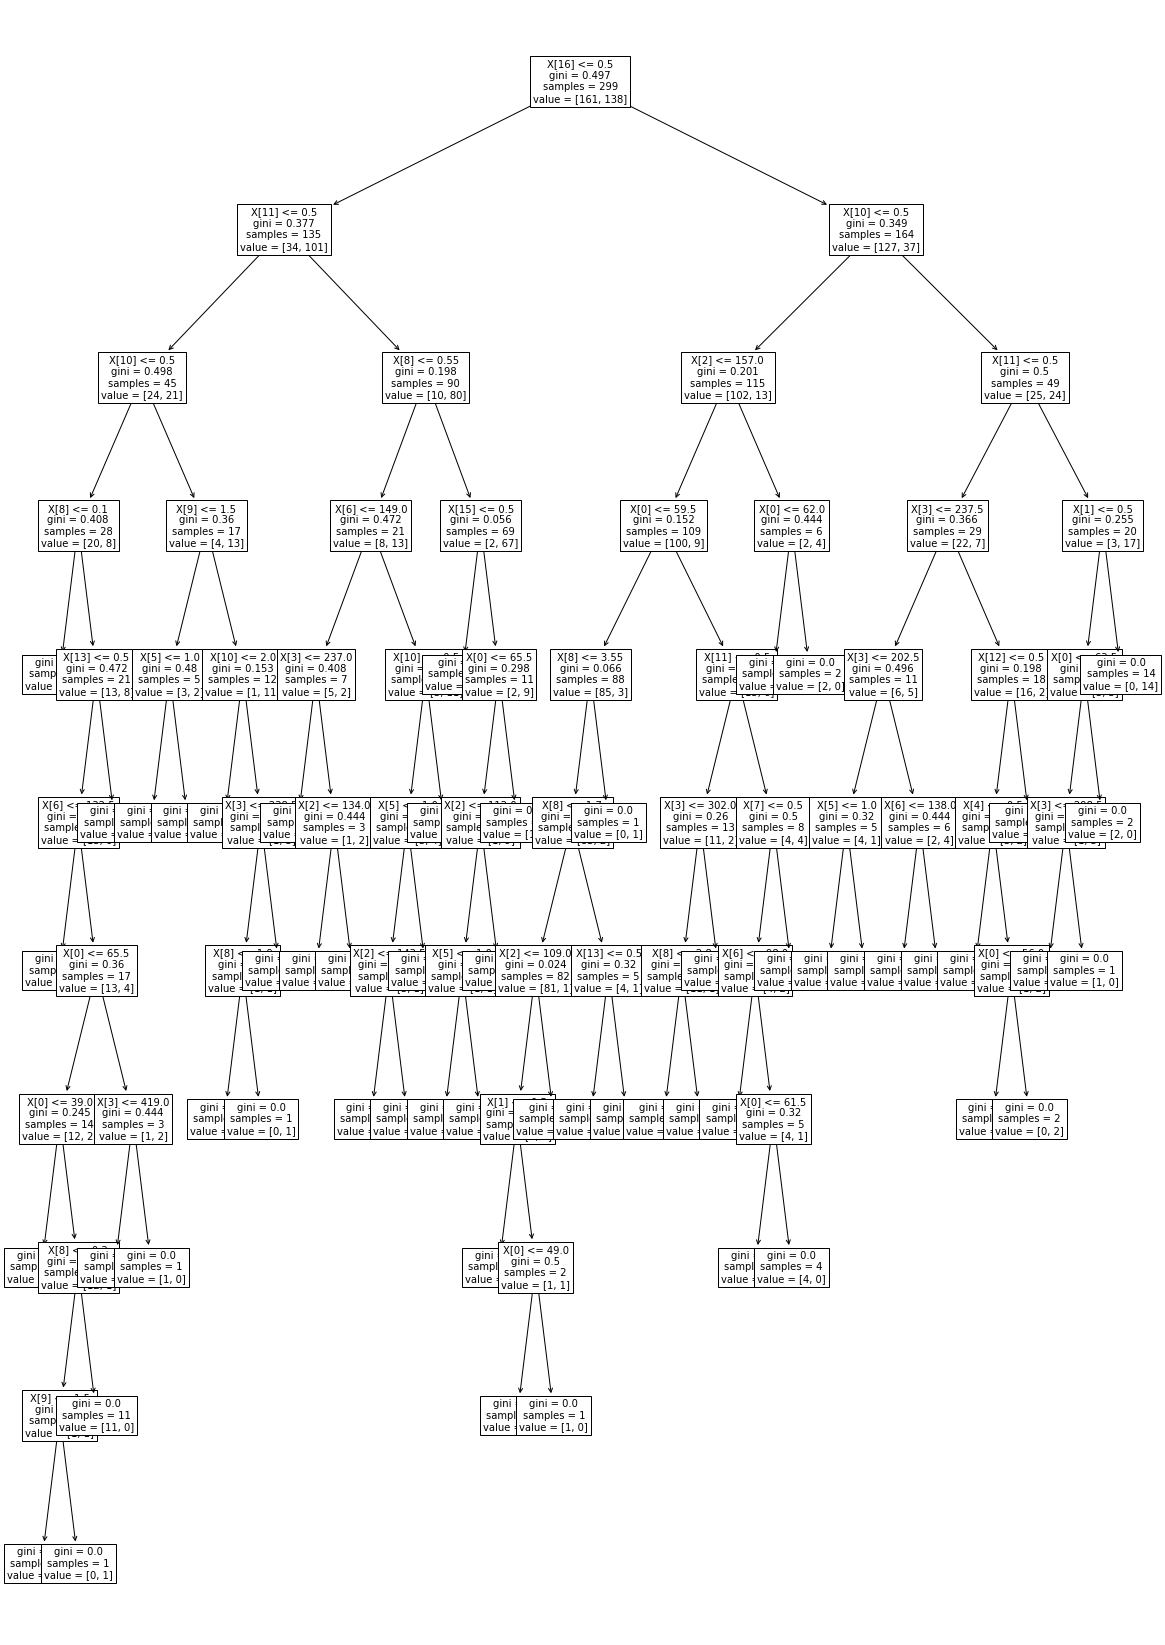

In [17]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

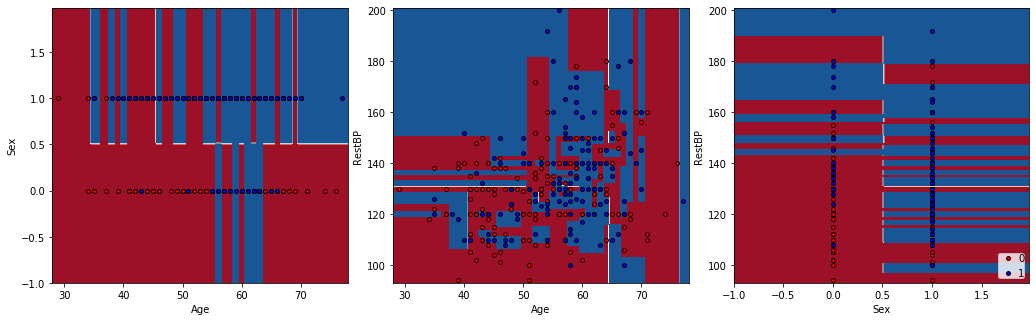

In [18]:
plot_tree_decision_regions(X, y)

#### Qualidade da divisão

Podemos definir a função que irá medir a qualidade da divisão:

*criterion{“gini”, “entropy”}, default=”gini”*  
*The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.*


In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
X_tree_scikit = clf.fit(X, y)

clf.get_depth()

10

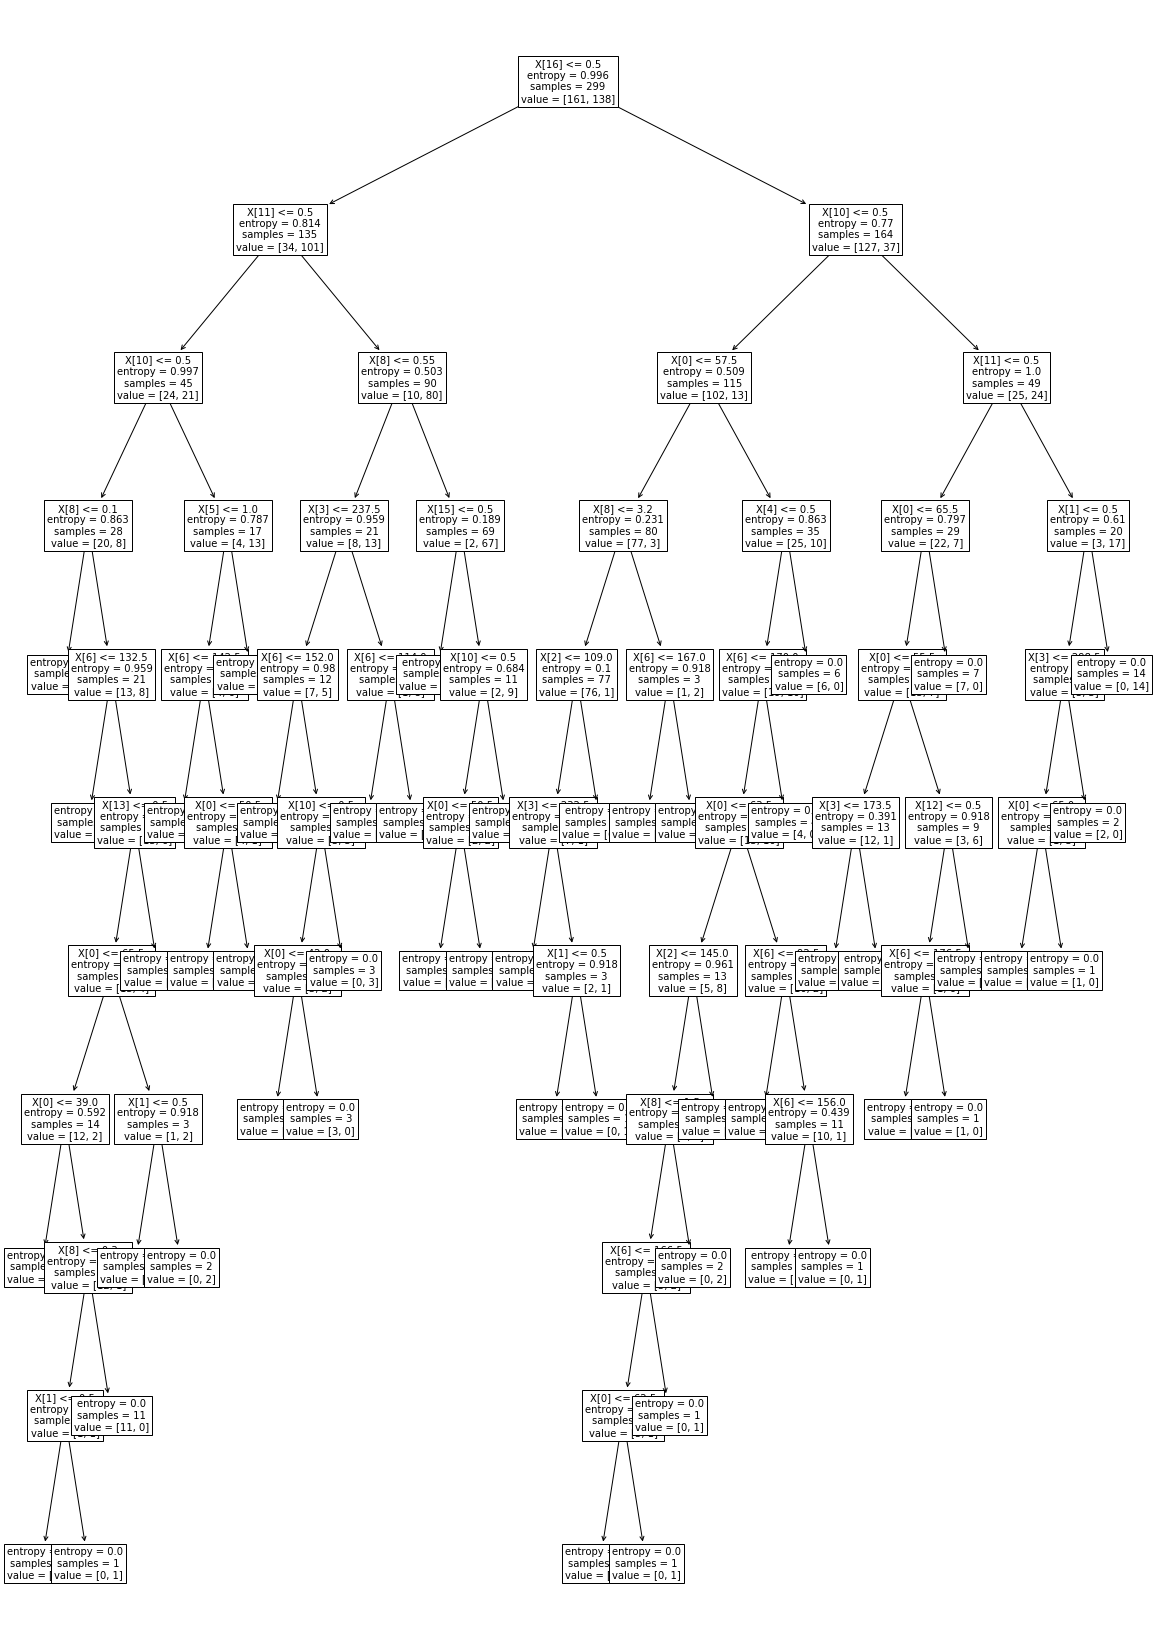

In [20]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

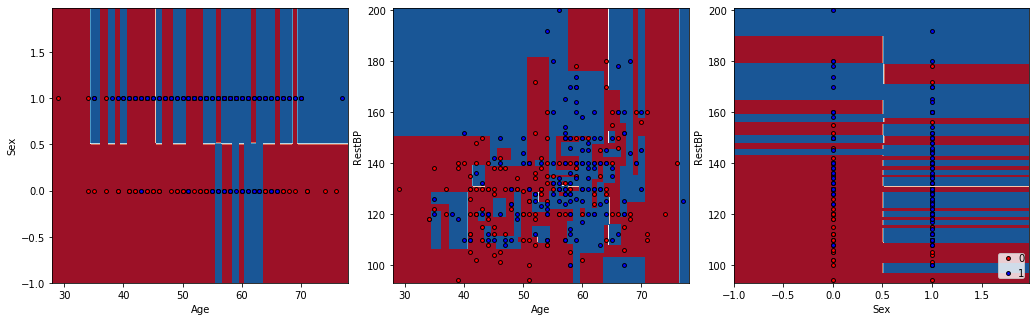

In [21]:
plot_tree_decision_regions(X, y, criterion="entropy")

#### Variando o prunning

Alguns hiperparâmetros de controle podem evitar o over-fitting:

*max_depth: int, default=None  
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.*

*min_samples_split: int or float, default=2
The minimum number of samples required to split an internal node*
  
*min_samples_leaf: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.*

*max_leaf_nodes: int, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.*

*min_impurity_decrease: float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.*

*min_impurity_split: float, default=0
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.*

In [22]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10)
X_tree_scikit = clf.fit(X, y)

In [23]:
clf.get_depth()

5

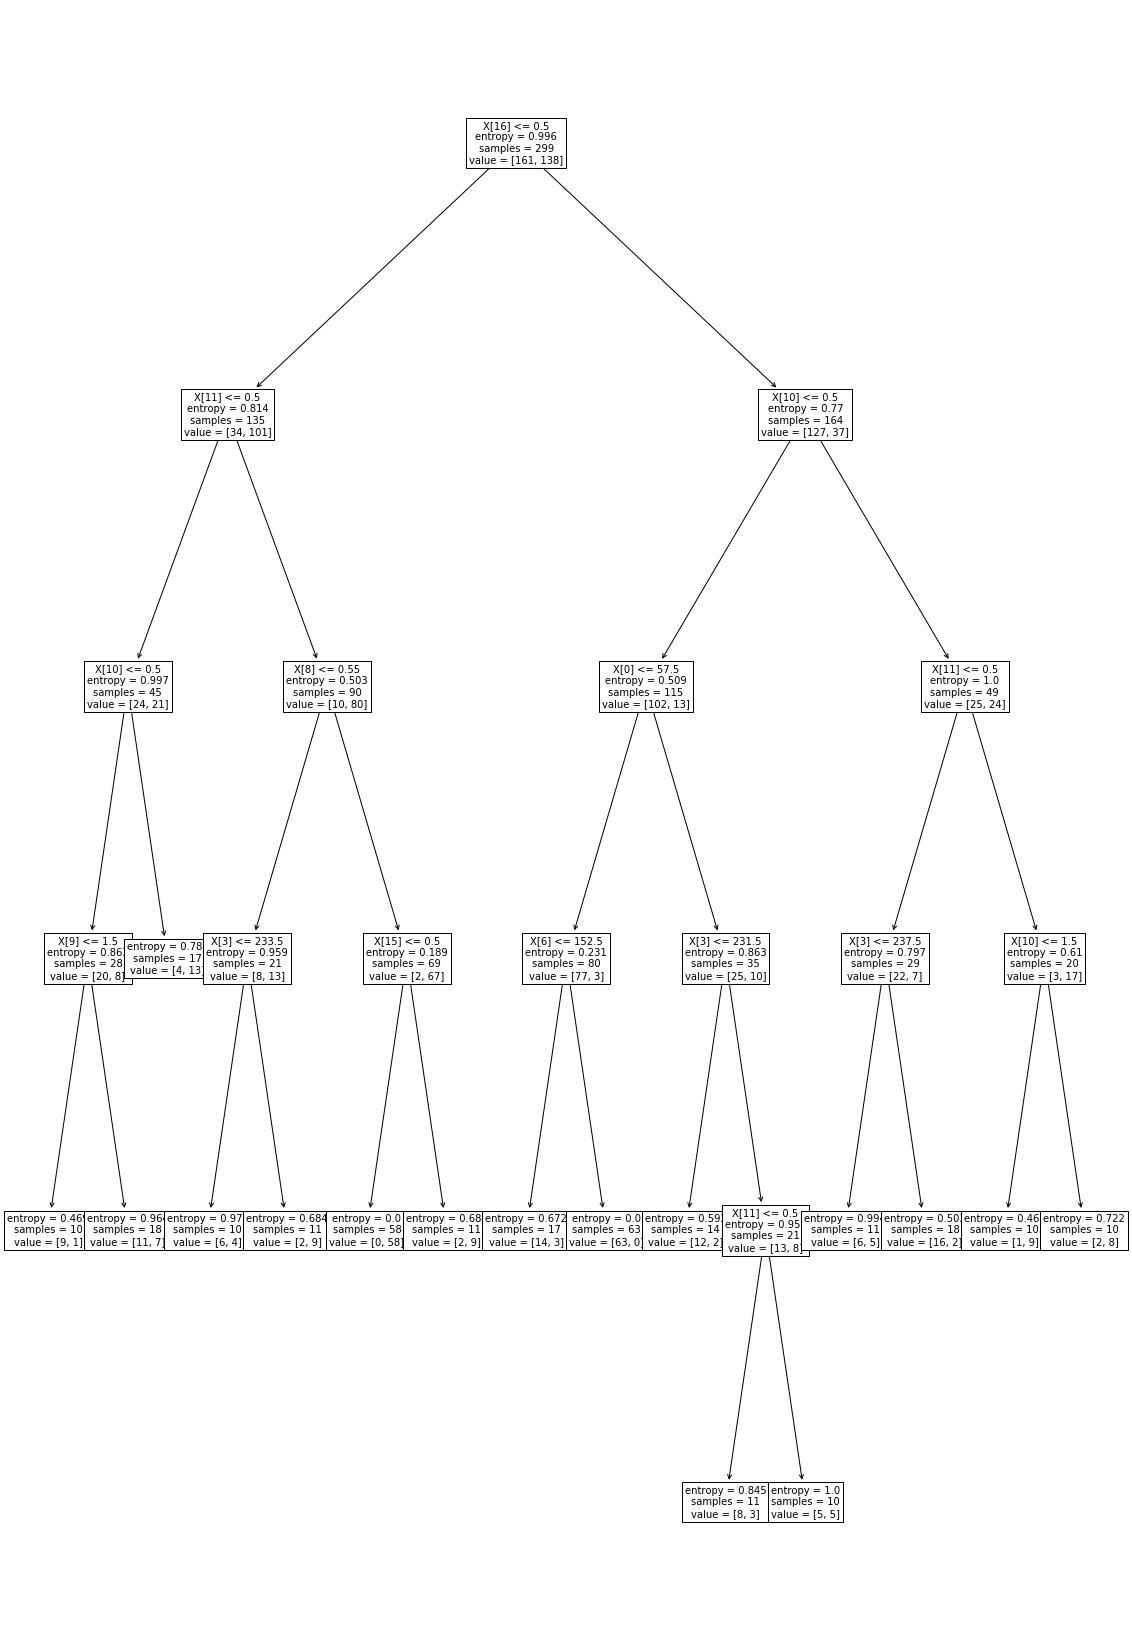

In [24]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

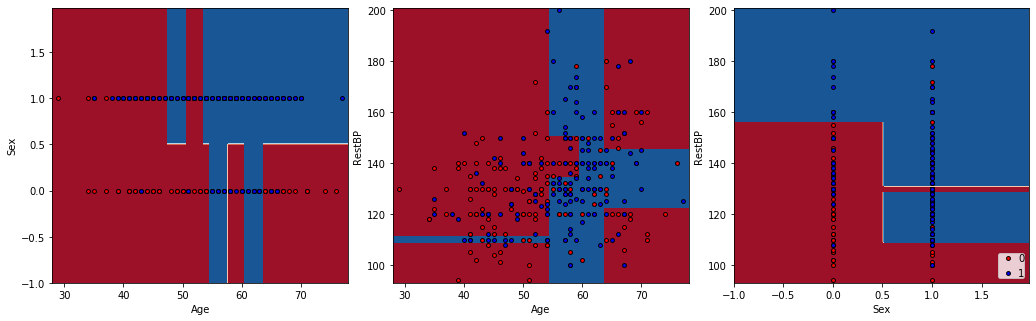

In [25]:
plot_tree_decision_regions(X, y, criterion="entropy", max_depth=5, min_samples_leaf=10)

#### Treino e Teste

Agora, separamos os dados em dois conjuntos: treino (70\%) e teste (30\%).

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [27]:
clf = tree.DecisionTreeClassifier()
X_train_tree_scikit = clf.fit(X_train, y_train)

In [28]:
clf.score(X_test, y_test)

0.7555555555555555

In [29]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[39  9]
 [13 29]]
Accuracy: 0.7555555555555555


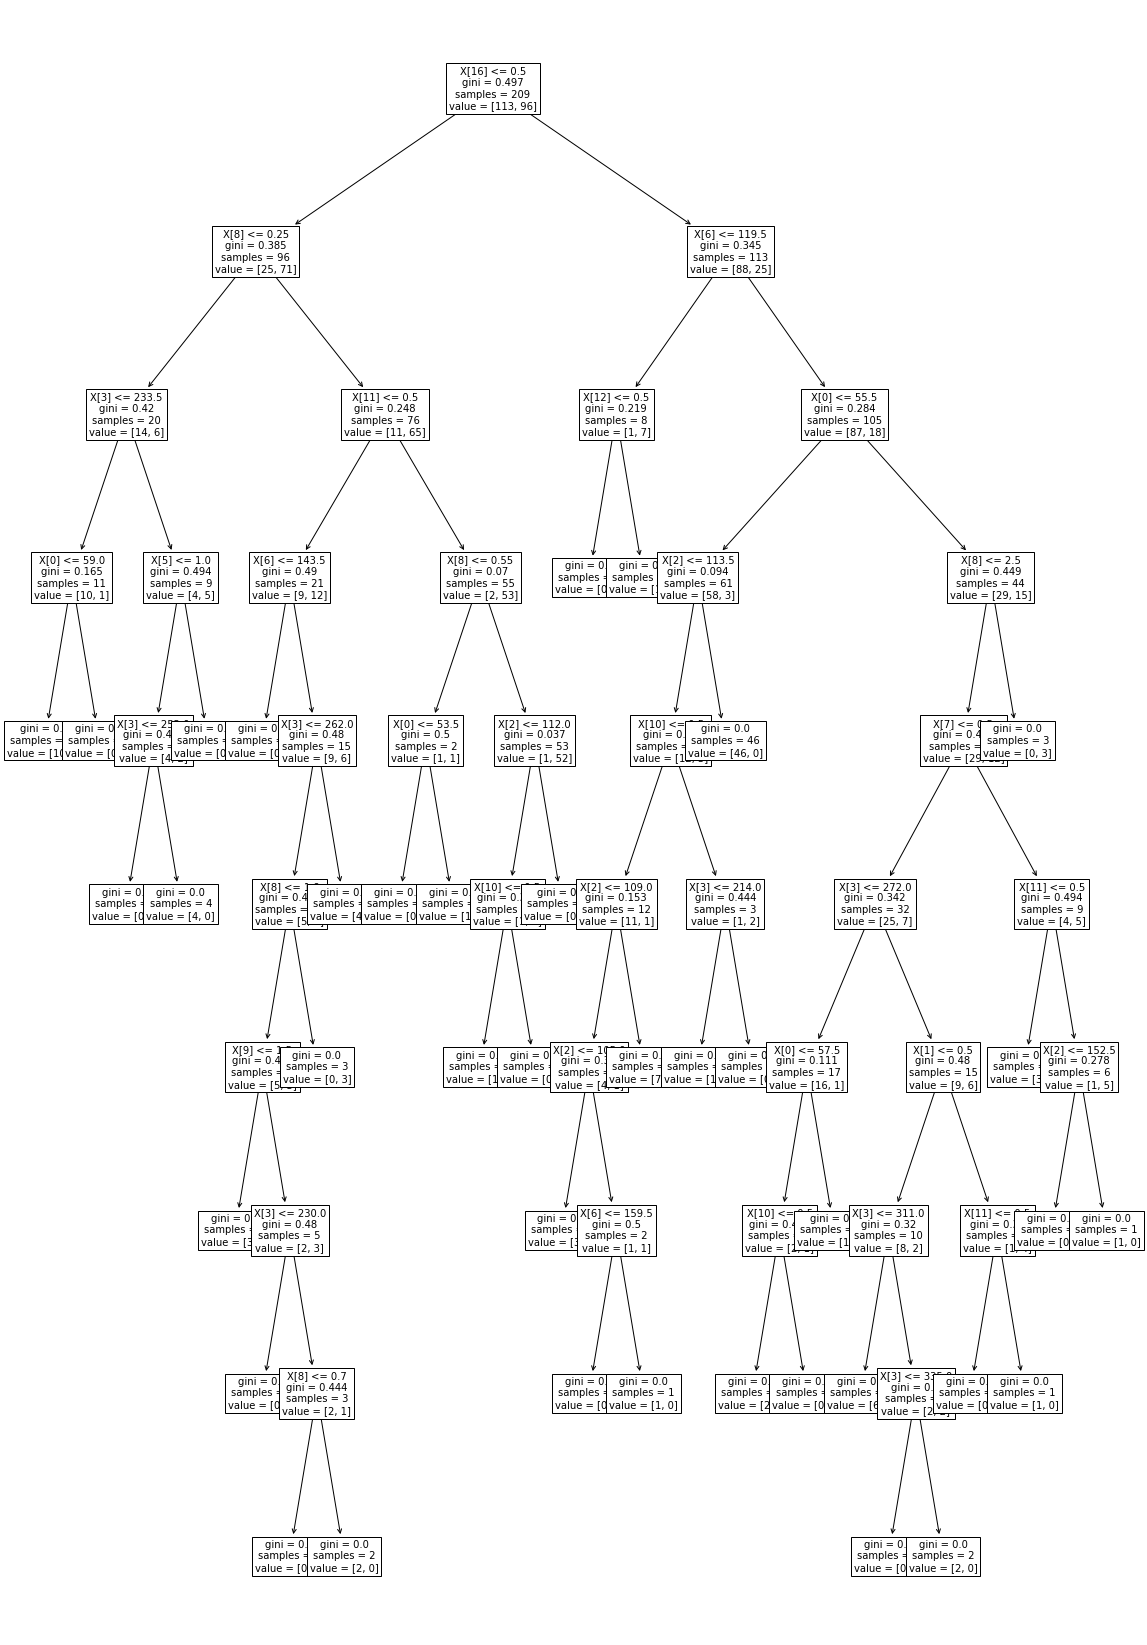

In [30]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
X_train_tree_scikit = clf.fit(X_train, y_train)

In [32]:
clf.score(X_test, y_test)

0.6777777777777778

In [33]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[34 14]
 [15 27]]
Accuracy: 0.6777777777777778


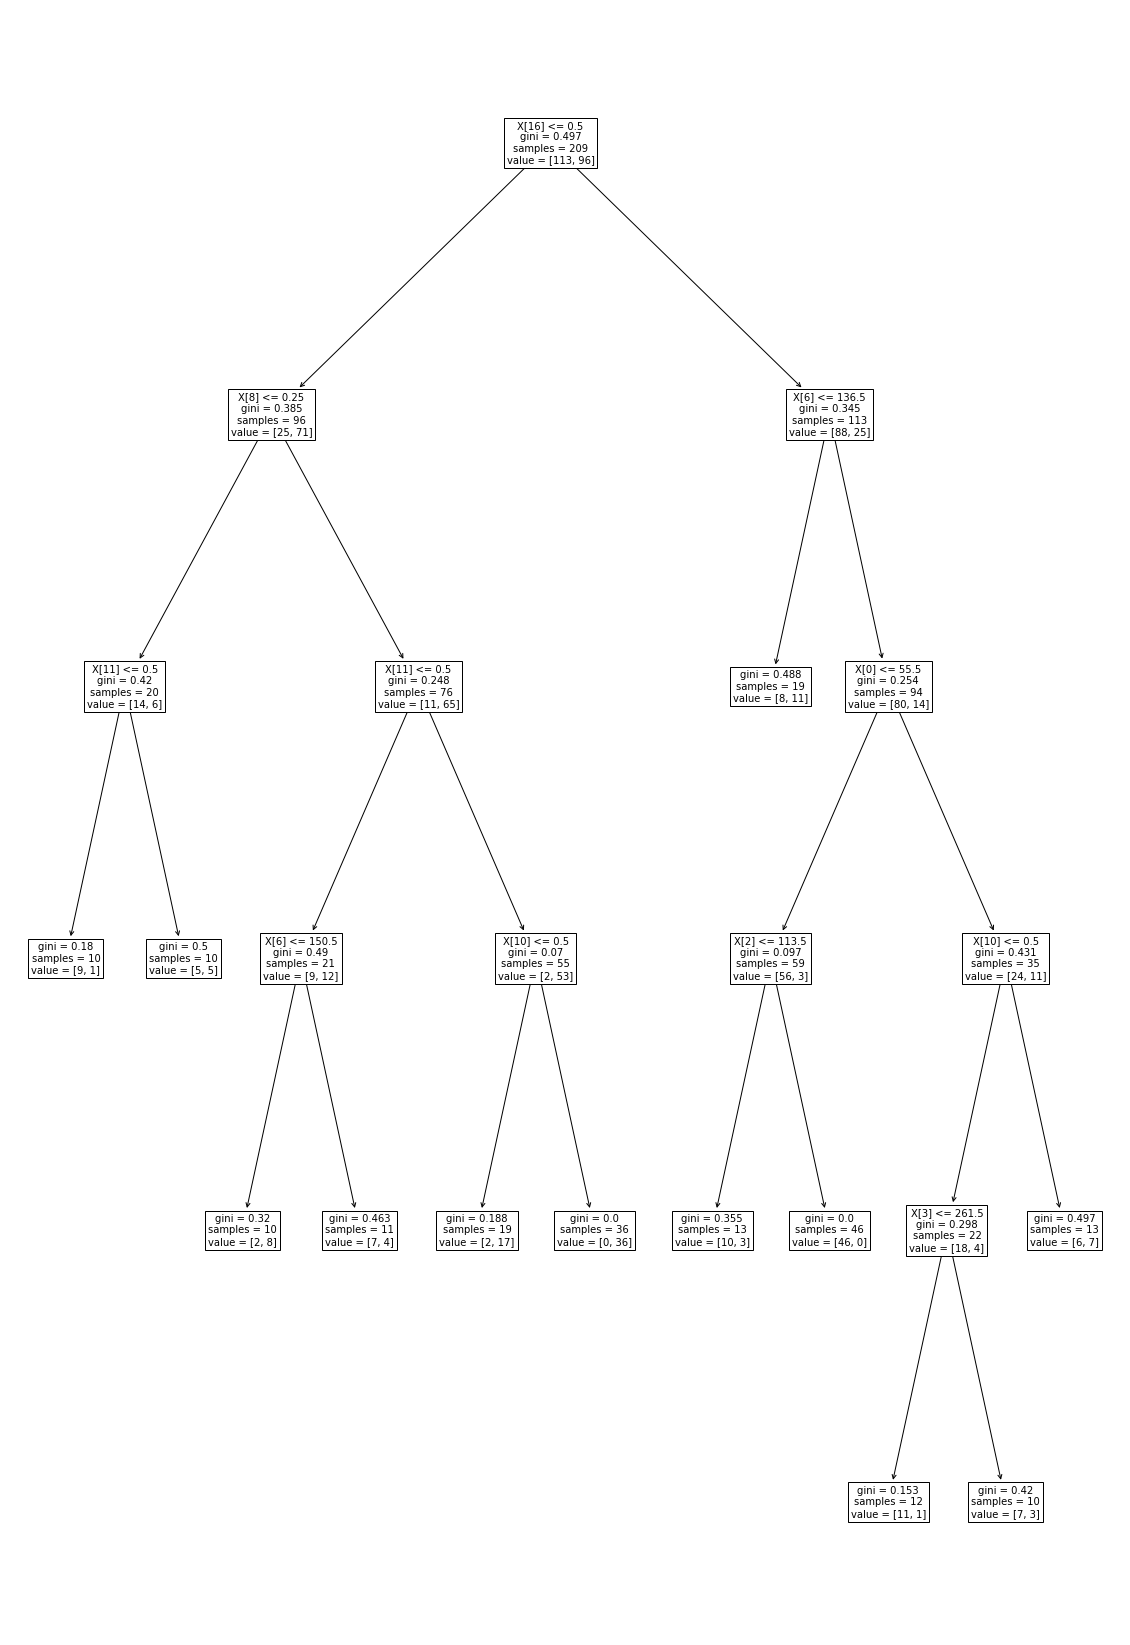

In [34]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

#### Árvores são sensíveis aos dados

De acordo com a árvore de classificação, a variável mais importante é X[16]. Ao remover a coluna 16, note como a árvore muda completamente.

In [35]:
X_new = np.delete(X, 16, axis=1)

In [36]:
clf_new = tree.DecisionTreeClassifier()
X_new_tree_scikit = clf_new.fit(X_new, y)

In [37]:
clf_new.get_depth()

9

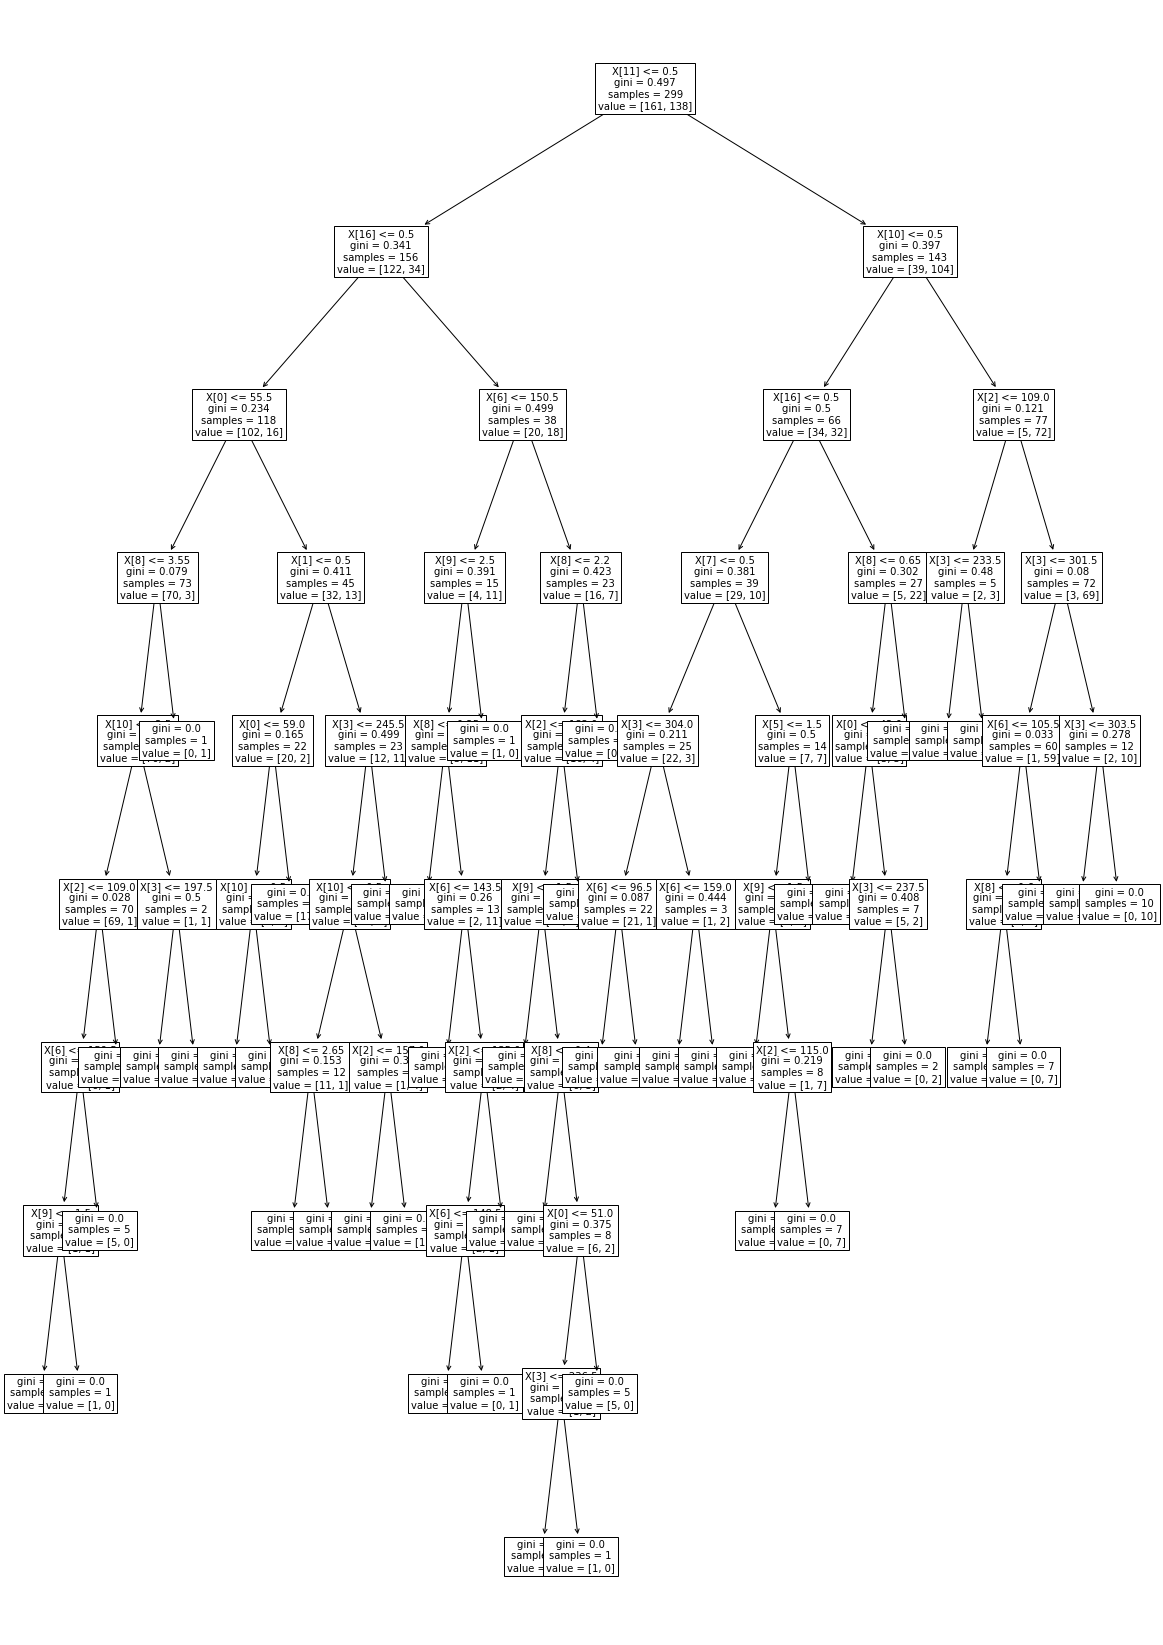

In [38]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf_new, fontsize=10) 
plt.show()

## Para explorar

* O `scikit-learn` possui muitos modelos de [Árvore de Decisão](http://scikit-learn.org/stable/modules/tree.html). 

* A [Wikipédia](https://en.wikipedia.org/wiki/Decision_tree_learning) é um bom ponto de partida para uma exploração mais ampla.